# Simple Linear Regression

Statistical technique for finding the existence of an association relationship between dependent & Independent variable.

Accuracy on test data
Next steps

In [191]:
# Import libraries
import matplotlib.pyplot as mp
from matplotlib import pyplot
import seaborn as sb

import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

from sklearn.model_selection import train_test_split
import sklearn.metrics as skm

In [192]:
#Read input data 
LE_df = pd.read_csv('Life Expectancy Data.csv')

In [193]:
#First 5 rows
LE_df.head()

,Country,Year,Status,Life_expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [194]:
#Check rows and columns in data
LE_df.shape

(2938, 22)

In [195]:
#basic checks on dataset
LE_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [196]:
LE_df.describe()

,Year,Life_expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [197]:
LE_df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [198]:
#Subset dataset
df = LE_df[LE_df["Year"]== 2015]
df = df[['Life_expectancy','Income composition of resources']]

In [199]:
df.shape

(183, 2)

In [200]:
#Null value treatment
df.dropna(inplace=True)

## Exploratory Data Analysis

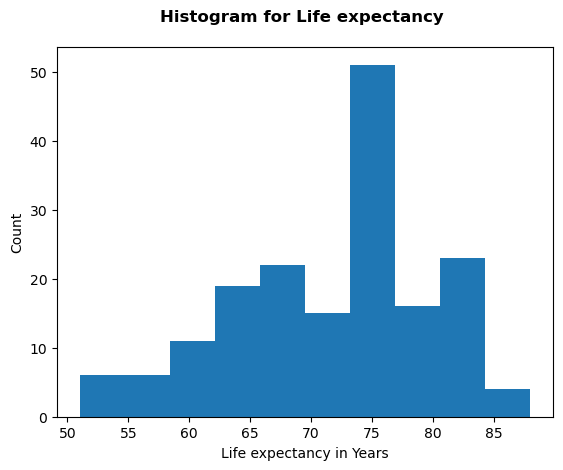

In [201]:
#EDA Histogram for Life Expectancy
mp.hist(df[['Life_expectancy']])
mp.ylabel('Count')
mp.xlabel('Life expectancy in Years')
  
mp.title('Histogram for Life expectancy \n',
          fontweight ="bold")
mp.show() 

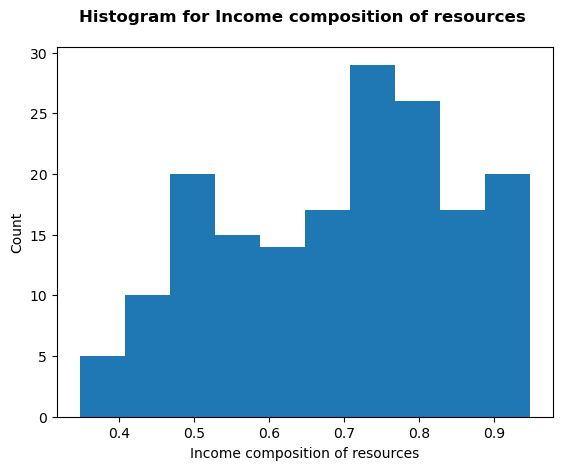

In [202]:
#Histogram for Income composition of resources
mp.hist(df[['Income composition of resources']])
mp.ylabel('Count')
mp.xlabel('Income composition of resources')
  
mp.title('Histogram for Income composition of resources \n',
          fontweight ="bold")
mp.show() 

In [203]:
print(df.corr())

                                 Life_expectancy  \
Life_expectancy                         1.000000   
Income composition of resources         0.907364   

                                 Income composition of resources  
Life_expectancy                                         0.907364  
Income composition of resources                         1.000000  


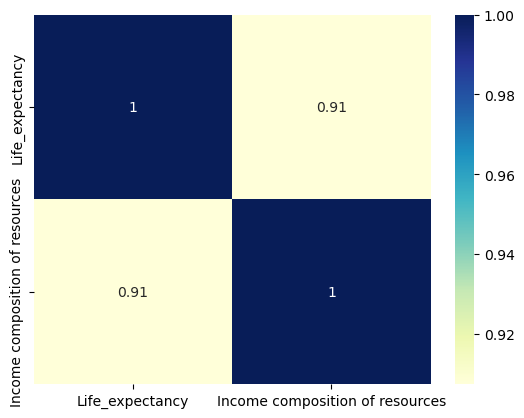

In [204]:
#Correlation Heatmap
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)

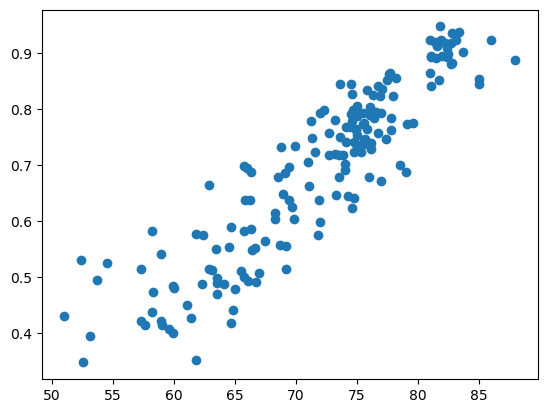

In [205]:
#Scatter plot
pyplot.scatter(df['Life_expectancy'],df['Income composition of resources'])
pyplot.show()

### Model Training

In [206]:
#Separate out train and test data
X= df["Income composition of resources"]
y= df["Life_expectancy"]


In [207]:
#split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=100)

In [208]:
len(X_train)

138

In [209]:
X_train=X_train.to_numpy()
X_test=X_test.to_numpy()
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [210]:
X_train = sm.add_constant(X_train)

In [211]:
model = sm.OLS(y_train, X_train)

In [212]:
results = model.fit()

In [213]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     621.8
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           1.40e-52
Time:                        11:08:45   Log-Likelihood:                -357.93
No. Observations:                 138   AIC:                             719.9
Df Residuals:                     136   BIC:                             725.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.3757      1.283     31.471      0.0

## Regression diagnostics

In many cases of statistical analysis, we are not sure whether our statistical model is correctly specified. For example when using ols, then linearity and homoscedasticity are assumed, some test statistics additionally assume that the errors are normally distributed or that we have a large sample. Since our results depend on these statistical assumptions, the results are only correct of our assumptions hold.

So we need to test whether our sample is consistent with these assumptions.

### Normal distribution of Residuals (Jarque-Bera and Omnibus Test)

JB and Omnibus test both are chi square test to check if residuals are normally distributed, 
<br>H0(Null Hypothesis): Residuals are normally distributed
<br>H1(Alternate Hypothesis): Residuals are not normally distributed

In [214]:
#Normality of the residuals-Jarque-Bera test:
name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
test = sms.jarque_bera(results.resid)
lzip(name, test)

[('Jarque-Bera', 21.83136548699496),
 ('Chi^2 two-tail prob.', 1.8171016313928828e-05),
 ('Skew', -0.7094319936987941),
 ('Kurtosis', 4.335508966797219)]

Residuals are negatively skewed and they have excess kurtosis which means thicker tail, but p value of JB & Omnibus test lies in acceptance zone of chi square test. Hence we can say that Residuals are <b>Normally distributed</b>

### Heteroscedasticity (Breush-Pagan test)

Residuals should have constant variance across different values of explanatory variable (X), which means residuals should be independent of X. Failure to meet this will violate assumptions of regression, to test heteroscedasticity we will perform Breush-Pagan test
<br>H0: There is homoskedasticity
<br>H1: Heteroskedasticity assumed

In [215]:
#Heteroskedasticity tests
#Breush-Pagan test
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(results.resid, results.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 7.998625414930187),
 ('p-value', 0.004681287420447607),
 ('f-value', 8.367704263916579),
 ('f p-value', 0.004449230682562699)]

Since p value is <0.05 we reject the null hypothesis and <b>Heteroskedasticity</b> is assumed <br>One very popular way to deal with heteroscedasticity is to transform the dependent variable

###  Test for Linearity (Harvey-Collier test)


Any pattern in reridual plot would indicate incorrect specification of the model, so we have to test for Linearity
<br>H0: True model is linear
<br>H1: Model is not linear

In [216]:
#Linearity
#Harvey-Collier test for linearity
name = ["t value", "p value"]
test = sms.linear_harvey_collier(results)
lzip(name, test)

[('t value', -0.2834814527212783), ('p value', 0.7772453037296991)]

Since results are not significant, we retain the null hypothesis that <b>Model is linear</b>

## Prediction

In [217]:
#Prediction on training data
predictions_Train = results.predict(X_train) 

In [218]:
predictions

array([72.89547036, 76.49433629, 64.92998045, 79.37342902, 70.9760752 ,
       76.44635141, 82.54043103, 81.43677882, 82.25252176, 74.23904697,
       70.64018105, 65.55378388, 82.58841591, 63.10655505, 72.31965182,
       71.02406008, 62.38678187, 75.53463871, 73.85516794, 74.62292601,
       58.30806716, 61.66700868, 78.79761048, 71.35995424, 75.82254798,
       69.24861956, 69.44055908, 83.45214374, 72.1277123 , 72.07972742,
       76.59030604, 78.17380705, 69.00869517, 74.09509234, 66.03363267,
       61.13917502, 76.20642701, 60.99522038, 76.35038165, 76.78224556,
       69.58451371, 71.8877879 , 69.00869517, 74.81486552, 72.94345524,
       59.1238101 , 76.54232116, 79.85327781, 55.28501978, 72.89547036,
       58.64396131, 63.15453993, 73.80718306, 82.54043103, 58.50000667,
       66.36952682, 66.36952682, 76.54232116, 72.99144012, 79.90126269,
       75.1027748 , 74.28703185, 81.38879394, 81.72468809, 73.66322843,
       80.71700563, 63.922298  , 66.08161755, 73.71121331, 73.99

In [219]:
#Adding constant
X_test = sm.add_constant(X_test)

In [220]:
#Prediction on test data
predictions_test = results.predict(X_test) 

In [221]:
predictions_test

array([82.8204968 , 76.52399069, 77.65645582, 80.91795539, 64.88224918,
       78.51712932, 72.90010228, 75.93510883, 79.06071258, 62.79851334,
       58.76693749, 80.60086515, 74.89324091, 74.16846323, 71.08815808,
       78.65302513, 71.94883158, 69.23091527, 66.92068641, 76.34279627,
       78.97011537, 66.42240175, 58.22335423, 65.42583244, 62.61731892,
       63.65918684, 73.12659531, 82.00512191, 75.39152557, 62.48142311,
       73.80607439, 81.05385121, 71.13345669, 71.54114413, 63.34209661])

In [222]:
#R2 for test data
print("R2 score =", round(skm.r2_score(y_test, predictions_test), 2))

R2 score = 0.83


In [223]:
#Mean absolute error
print("Mean absolute error =", round(skm.mean_absolute_error(y_test, predictions_test), 2)) 

Mean absolute error = 2.8
